# Итоговая работа.

In [384]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [385]:
x0 = 1
u = np.sin(x0) + np.cos(2*x0 + 3)
u_pr = np.cos(x0) - 2 * np.sin(2*x0 + 3)
f_pr = 2 * np.tan(u) * (1 / np.cos(u))**2 * u_pr

print("Производная функции в точке x0=1: ",f_pr)

Производная функции в точке x0=1:  55.38591763533785


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

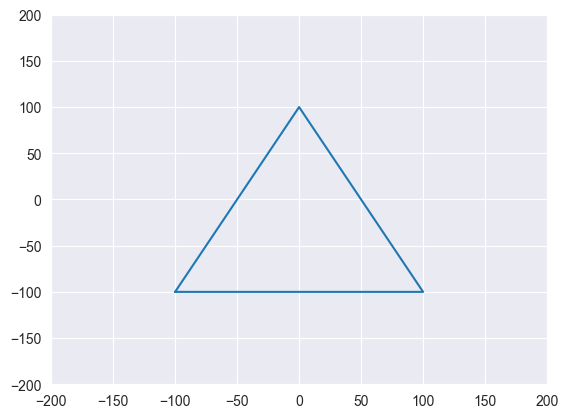

In [386]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


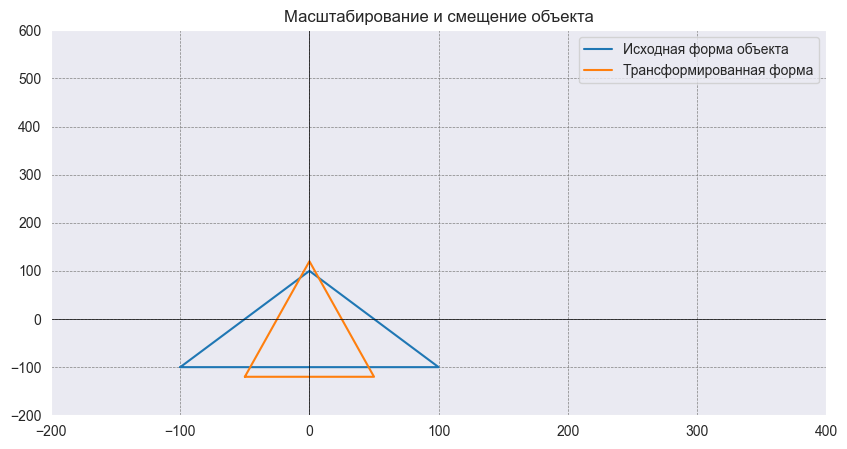

In [387]:
S = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])

T = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [200, 300, 1]
])

A_scaled = np.dot(A, S.T)

A_trans = np.dot(A_scaled, T.T)

x_original = A[:, 0]
y_original = A[:, 1]

x_transformed = A_trans[:, 0]
y_transformed = A_trans[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(x_original, y_original, label='Исходная форма объекта')
plt.plot(x_transformed, y_transformed, label='Трансформированная форма')
plt.ylim([-200, 600])
plt.xlim([-200, 400])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Масштабирование и смещение объекта')
plt.show()

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [388]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [389]:
eigen_val, eigen_vect = np.linalg.eig(m)

print("Собственные значения матрицы:")
print(eigen_val)  # [ 3. -1.]

print("\nСобственные вектора матрицы:")
print(eigen_vect)

Собственные значения матрицы:
[ 3. -1.]

Собственные вектора матрицы:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [390]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [391]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

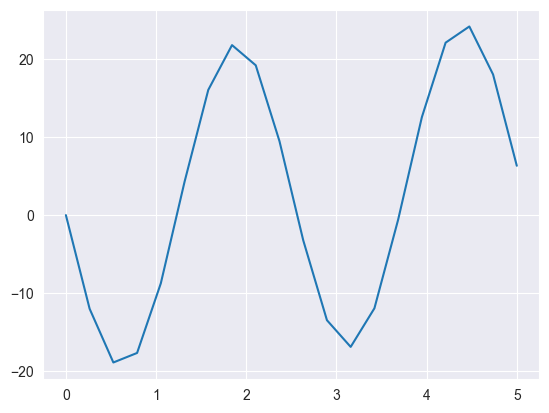

In [392]:
plt.plot(x, fx)
plt.show()

In [393]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Оптимальные параметры: a = 1.952781768364983, b = 1.5662770601038896


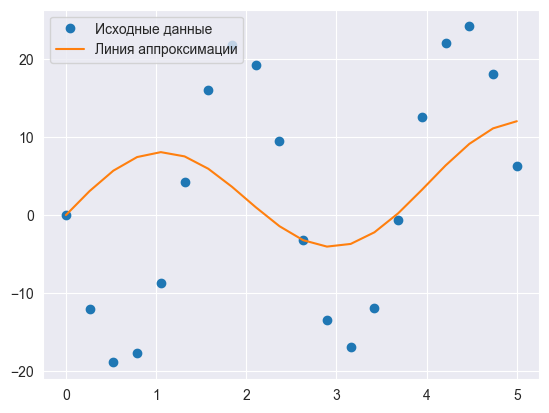

In [394]:
initial_guess = [1.9, 1.5] # предполагаемые нач значения

result = minimize(error, initial_guess, method='Nelder-Mead') # BFGS

a_opt, b_opt = result.x
print(f"Оптимальные параметры: a = {a_opt}, b = {b_opt}")

plt.plot(x, fx, 'o', label='Исходные данные')
plt.plot(x, f(x, a_opt, b_opt), '-', label='Линия аппроксимации')
plt.legend()
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [395]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [396]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(raitings)

similar_users = []
for i in range(10):
    cos_sim[i][i] = -1  # Исключаем себя
    most_similar_user = np.argmax(cos_sim[i])
    similar_users.append((i, int(most_similar_user)))

print("10 пар наиболее похожих пользователей:")
for pair in similar_users:
    print(pair)

10 пар наиболее похожих пользователей:
(0, 8)
(1, 4)
(2, 9)
(3, 9)
(4, 8)
(5, 9)
(6, 3)
(7, 5)
(8, 0)
(9, 2)
